In [17]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


In [88]:
### Function to plot basemap and lon lat labels ###
def plot_background(ax):
    ax.add_feature(cf.LAKES.with_scale('10m'),facecolor='none', edgecolor='black',linewidth=0.8)
    ax.add_feature(cf.COASTLINE.with_scale('10m'),facecolor='none', edgecolor='black', linewidth=2) 
    return ax

def plot_ticks(ax):
    ax.set_yticks(np.arange(5, 22, 5), crs=ccrs.PlateCarree())
    ax.set_xticks(np.arange(115, 127, 5), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    return ax

In [19]:
vmin = 0
vmax = 0.5


In [20]:
loc = 'Cebu'

fp = f'{loc}/{loc}_AOD_0317_0515_2019'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']
df['val'] = df['val']*0.001

df_2019 = df

fp = f'{loc}/{loc}_AOD_0317_0515_2020'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']
df['val'] = df['val']*0.001

df_2020 = df

fp = f'{loc}/{loc}_AOD_0317_0515_2021'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']
df['val'] = df['val']*0.001

df_2021 = df

In [21]:
df_2021

,Unnamed: 0,y,x,val,lat,lon
0,0,11.583776,124.043866,0.411,11.583776,124.043866
1,1,11.574792,124.043866,0.405,11.574792,124.043866
2,2,11.520894,124.097765,0.307,11.520894,124.097765
3,3,11.520894,124.106748,0.313,11.520894,124.106748
4,4,11.511910,124.088782,0.266,11.511910,124.088782
...,...,...,...,...,...,...
1837,1837,9.553583,123.415045,0.103,9.553583,123.415045
1838,1838,9.553583,123.424028,0.087,9.553583,123.424028
1839,1839,9.544600,123.406062,0.117,9.544600,123.406062
1840,1840,9.544600,123.415045,0.102,9.544600,123.415045


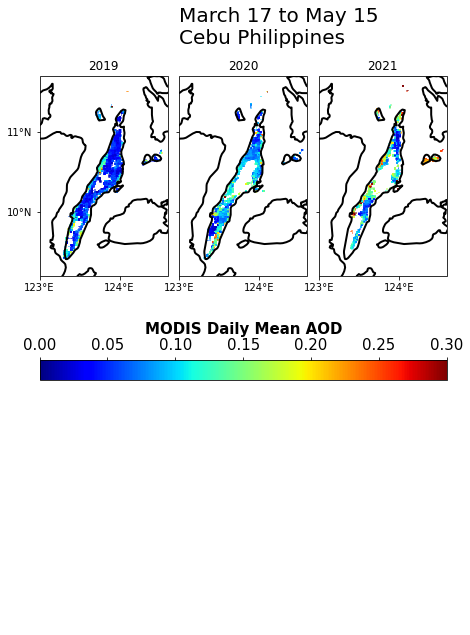

In [67]:
vmax =0.3
xl = 123.
xu = 124.6
yl = 9.2
yu = 11.7
yu_ = 12.1

a4_dims = (20,20)


s = 0.2
fig = plt.figure(figsize=(8.55,11))
gs = fig.add_gridspec(2, 7,hspace=0.05)#,wspace=-0.51)
ax = fig.add_subplot(gs[0:1, 0:2], projection=ccrs.PlateCarree())
plot_background(ax)
plot_ticks(ax)
ax.scatter(df_2019['lon'], df_2019['lat'], c=df_2019['val'], cmap='jet', vmin=vmin,vmax=vmax,   s=s, marker="s",  transform=ccrs.PlateCarree())

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
#ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)

plt.ylim(yl, yu)
plt.xlim(xl, xu)

plt.title(f'2019') 
############################
ax= fig.add_subplot(gs[0:1,2:4], projection=ccrs.PlateCarree())
plot_background(ax)
plot_ticks(ax)
ax.scatter(df_2020['lon'], df_2020['lat'], c=df_2020['val'], cmap='jet', vmin=vmin,vmax=vmax,   s=s, marker="s",  transform=ccrs.PlateCarree())
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='y', left=True,right=False,labelleft=False) 
#ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)

plt.ylim(yl, yu)
plt.xlim(xl, xu)
plt.text(123., yu_, 'March 17 to May 15 \nCebu Philippines', fontsize=20)
plt.title(f'2020') 
##############################
ax= fig.add_subplot(gs[0:1,4:6], projection=ccrs.PlateCarree())
plot_background(ax)
plot_ticks(ax)
ax.scatter(df_2021['lon'], df_2021['lat'], c=df_2021['val'], cmap='jet', vmin=vmin,vmax=vmax,   s=s, marker="s", transform=ccrs.PlateCarree())
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='y', left=True,right=False,labelleft=False) 
#ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)

plt.ylim(yl, yu)
plt.xlim(xl, xu)
plt.title(f'2021') 
ax= fig.add_subplot(gs[1,0:6])
ax.axis('off')
cbar2 = fig.colorbar(cbar, ax=ax, orientation="horizontal",  location ='top')
cbar2.set_label(label='MODIS Daily Mean AOD', size=15, weight='bold')
cbar2.ax.tick_params(labelsize=15)

#plt.title(f'Daily Mean NO2 for 03-17 to 05-15 2019')    
plt.savefig(f'MODIS_AOD_2019_2021_Cebu.jpg', dpi=500,  facecolor='white', bbox_inches="tight")

In [89]:
loc = 'PH'

fp = f'{loc}/{loc}_AOD_0317_0515_2019'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']
df['val'] = df['val']*0.001
df_2019 = df

fp = f'{loc}/{loc}_AOD_0317_0515_2020'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']
df['val'] = df['val']*0.001
df_2020 = df

fp = f'{loc}/{loc}_AOD_0317_0515_2021'
df = pd.read_csv(f'{fp}.csv')
df['lat'] = df['y']
df['lon'] = df['x']
df['val'] = df['val']*0.001
df_2021 = df

In [90]:
df_2021

,Unnamed: 0,y,x,val,lat,lon
0,0,20.791507,121.825027,0.0520,20.791507,121.825027
1,1,20.773541,121.816044,0.1060,20.773541,121.816044
2,2,20.773541,121.842994,0.1330,20.773541,121.842994
3,3,20.773541,121.851977,0.1340,20.773541,121.851977
4,4,20.773541,121.860960,0.1350,20.773541,121.860960
...,...,...,...,...,...,...
136136,136136,4.747596,119.498391,0.2280,4.747596,119.498391
136137,136137,4.747596,119.507374,0.2470,4.747596,119.507374
136138,136138,4.738613,119.489408,0.2050,4.738613,119.489408
136139,136139,4.738613,119.498391,0.2345,4.738613,119.498391


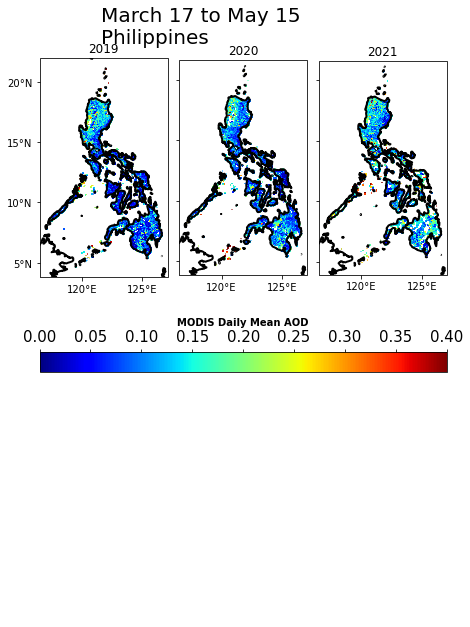

In [96]:
vmax=0.4
'''xl = 123.
xu = 124.6
yl = 9.2
yu = 11.7'''
yu_ = 23

a4_dims = (20,20)


s = 0.1
fig = plt.figure(figsize=(8.55,11))
gs = fig.add_gridspec(2, 7,hspace=0.05)#,wspace=-0.51)
ax = fig.add_subplot(gs[0:1, 0:2], projection=ccrs.PlateCarree())
plot_background(ax)
plot_ticks(ax)
ax.scatter(df_2019['lon'], df_2019['lat'], c=df_2019['val'], cmap='jet', vmin=vmin,vmax=vmax,   s=s, marker="s",  transform=ccrs.PlateCarree())

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
#ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)

#plt.ylim(yl, yu)
#plt.xlim(xl, xu)

plt.title(f'2019') 
############################
ax= fig.add_subplot(gs[0:1,2:4], projection=ccrs.PlateCarree())
plot_background(ax)
plot_ticks(ax)
ax.scatter(df_2020['lon'], df_2020['lat'], c=df_2020['val'], cmap='jet', vmin=vmin,vmax=vmax,   s=s, marker="s",  transform=ccrs.PlateCarree())
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='y', left=True,right=False,labelleft=False) 
#ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)

#plt.ylim(yl, yu)
#plt.xlim(xl, xu)
plt.text(110., yu_, 'March 17 to May 15 \nPhilippines', fontsize=20)
plt.title(f'2020') 
##############################
ax= fig.add_subplot(gs[0:1,4:6], projection=ccrs.PlateCarree())
plot_background(ax)
plot_ticks(ax)
ax.scatter(df_2021['lon'], df_2021['lat'], c=df_2021['val'], cmap='jet', vmin=vmin,vmax=vmax,   s=s, marker="s", transform=ccrs.PlateCarree())
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='y', left=True,right=False,labelleft=False) 
#ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)

#plt.ylim(yl, yu)
#plt.xlim(xl, xu)
plt.title(f'2021') 
ax= fig.add_subplot(gs[1,0:6])
ax.axis('off')
cbar2 = fig.colorbar(cbar, ax=ax, orientation="horizontal",  location ='top')
cbar2.set_label(label='MODIS Daily Mean AOD', size=10, weight='bold')
cbar2.ax.tick_params(labelsize=15)

#plt.title(f'Daily Mean NO2 for 03-17 to 05-15 2019')    
plt.savefig(f'MODIS_AOD_2019_2021_PH_v2.jpg', dpi=500,  facecolor='white', bbox_inches="tight")

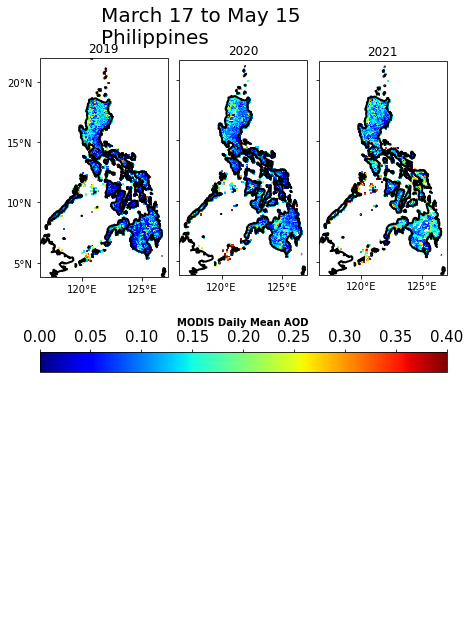

In [95]:
vmax=0.4
'''xl = 123.
xu = 124.6
yl = 9.2
yu = 11.7'''
yu_ = 23

a4_dims = (20,20)


s = 1.
fig = plt.figure(figsize=(8.55,11))
gs = fig.add_gridspec(2, 7,hspace=0.05)#,wspace=-0.51)
ax = fig.add_subplot(gs[0:1, 0:2], projection=ccrs.PlateCarree())
plot_background(ax)
plot_ticks(ax)
ax.scatter(df_2019['lon'], df_2019['lat'], c=df_2019['val'], cmap='jet', vmin=vmin,vmax=vmax,   s=s, marker="s",  transform=ccrs.PlateCarree())

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
#ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)

#plt.ylim(yl, yu)
#plt.xlim(xl, xu)

plt.title(f'2019') 
############################
ax= fig.add_subplot(gs[0:1,2:4], projection=ccrs.PlateCarree())
plot_background(ax)
plot_ticks(ax)
ax.scatter(df_2020['lon'], df_2020['lat'], c=df_2020['val'], cmap='jet', vmin=vmin,vmax=vmax,   s=s, marker="s",  transform=ccrs.PlateCarree())
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='y', left=True,right=False,labelleft=False) 
#ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)

#plt.ylim(yl, yu)
#plt.xlim(xl, xu)
plt.text(110., yu_, 'March 17 to May 15 \nPhilippines', fontsize=20)
plt.title(f'2020') 
##############################
ax= fig.add_subplot(gs[0:1,4:6], projection=ccrs.PlateCarree())
plot_background(ax)
plot_ticks(ax)
ax.scatter(df_2021['lon'], df_2021['lat'], c=df_2021['val'], cmap='jet', vmin=vmin,vmax=vmax,   s=s, marker="s", transform=ccrs.PlateCarree())
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='jet')
ax.tick_params(axis='y', left=True,right=False,labelleft=False) 
#ax.tick_params(axis='both', which='major', labelsize=6)
plt.autoscale(False)

#plt.ylim(yl, yu)
#plt.xlim(xl, xu)
plt.title(f'2021') 
ax= fig.add_subplot(gs[1,0:6])
ax.axis('off')
cbar2 = fig.colorbar(cbar, ax=ax, orientation="horizontal",  location ='top')
cbar2.set_label(label='MODIS Daily Mean AOD', size=10, weight='bold')
cbar2.ax.tick_params(labelsize=15)

#plt.title(f'Daily Mean NO2 for 03-17 to 05-15 2019')    
plt.savefig(f'MODIS_AOD_2019_2021_PH_v3.jpg', dpi=500,  facecolor='white', bbox_inches="tight")